#WordCloud

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [ ]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/Hotel_Reviews_Jun19.csv

--2022-04-01 13:54:44--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/Hotel_Reviews_Jun19.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.150.58
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.150.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124452060 (119M) [text/csv]
Saving to: ‘Hotel_Reviews_Jun19.csv’

Hotel_Reviews_Jun19 100%[===================>] 118.69M  36.9MB/s    in 3.7s    

2022-04-01 13:54:48 (31.7 MB/s) - ‘Hotel_Reviews_Jun19.csv’ saved [124452060/124452060]



In [ ]:
df = pd.read_csv('Hotel_Reviews_Jun19.csv')
df

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.441780,...,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,2016-10-09T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,2016-10-31T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,"2016-10-09T00:00:00Z,2016-03-27T00:00:00Z",2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AVwdatg0ByjofQCxo5S5,2017-04-14T05:04:33Z,2018-12-02T13:36:35Z,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",Accommodation & Food Services,Hampton,US,us/va/hampton/3101coliseumdr/-1319580369,37.057650,...,"2016-03-16T00:00:00Z,2016-04-03T00:00:00Z",4,http://www.tripadvisor.com/Hotel_Review-g57804...,My friends and I took a trip to Hampton for th...,Very accommodating and friendly staff!,Wallingford,CT,Tiffany1017,https://www.tripadvisor.com/Hotel_Review-g5780...,https://ad.doubleclick.net/ddm/clk/317271033;1...
9996,AVwdatg0ByjofQCxo5S5,2017-04-14T05:04:33Z,2018-12-02T13:36:35Z,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",Accommodation & Food Services,Hampton,US,us/va/hampton/3101coliseumdr/-1319580369,37.057650,...,2016-04-03T00:00:00Z,5,http://www.tripadvisor.com/Hotel_Review-g57804...,"from check in to departure, staff is friendly,...","comfortable, friendly, clean, professional",Homer,AK,bobg187,https://www.tripadvisor.com/Hotel_Review-g5780...,https://ad.doubleclick.net/ddm/clk/317271033;1...
9997,AVwdatg0ByjofQCxo5S5,2017-04-14T05:04:33Z,2018-12-02T13:36:35Z,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",A

In [ ]:
df['reviews.text']

0       This hotel was nice and quiet. Did not know, t...
1       We stayed in the king suite with the separatio...
2       Parking was horrible, somebody ran into my ren...
3       Not cheap but excellent location. Price is som...
4       If you get the room that they advertised on th...
                              ...                        
9995    My friends and I took a trip to Hampton for th...
9996    from check in to departure, staff is friendly,...
9997    This Hampton is located on a quiet street acro...
9998    Awesome wings (my favorite was garlic parmesan...
9999    Clean facility just off freeway ..... staff fr...
Name: reviews.text, Length: 10000, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  object 
 1   dateAdded             10000 non-null  object 
 2   dateUpdated           10000 non-null  object 
 3   address               10000 non-null  object 
 4   categories            10000 non-null  object 
 5   primaryCategories     10000 non-null  object 
 6   city                  10000 non-null  object 
 7   country               10000 non-null  object 
 8   keys                  10000 non-null  object 
 9   latitude              10000 non-null  float64
 10  longitude             10000 non-null  float64
 11  name                  10000 non-null  object 
 12  postalCode            10000 non-null  object 
 13  province              10000 non-null  object 
 14  reviews.date          10000 non-null  object 
 15  reviews.dateAdded   

## 2. Standard Word Cloud

In [ ]:
text = df['reviews.text'][1]
text

"We stayed in the king suite with the separation between the bedroom and the living space. The sofa bed wasn't very good I had back discomfort by the day we left on our three night stay. The room is clean, and the king bed very comfortable. This hotel is located within walking distance to most places you will want to... More"

In [ ]:
wordcloud = WordCloud()
print(wordcloud)

In [ ]:
#open help
?WordCloud

In [ ]:
wordcloud.generate(text)

(-0.5, 399.5, 199.5, -0.5)

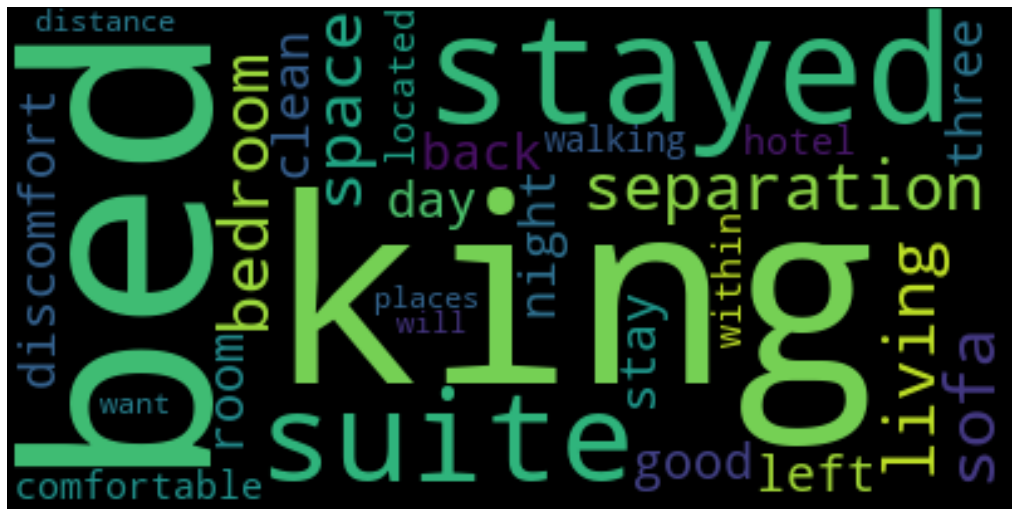

In [ ]:
# word cloud only first row

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
#save wordcloud
wordcloud.to_file('wordcloud.png')

In [ ]:
print([row for row in df['reviews.text']])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#collapse all row in a string 
text = " ".join(row for row in df['reviews.text'])

In [ ]:
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 3000, height = 2000,background_color='white',stopwords=stopwords)
wordcloud.generate(text)

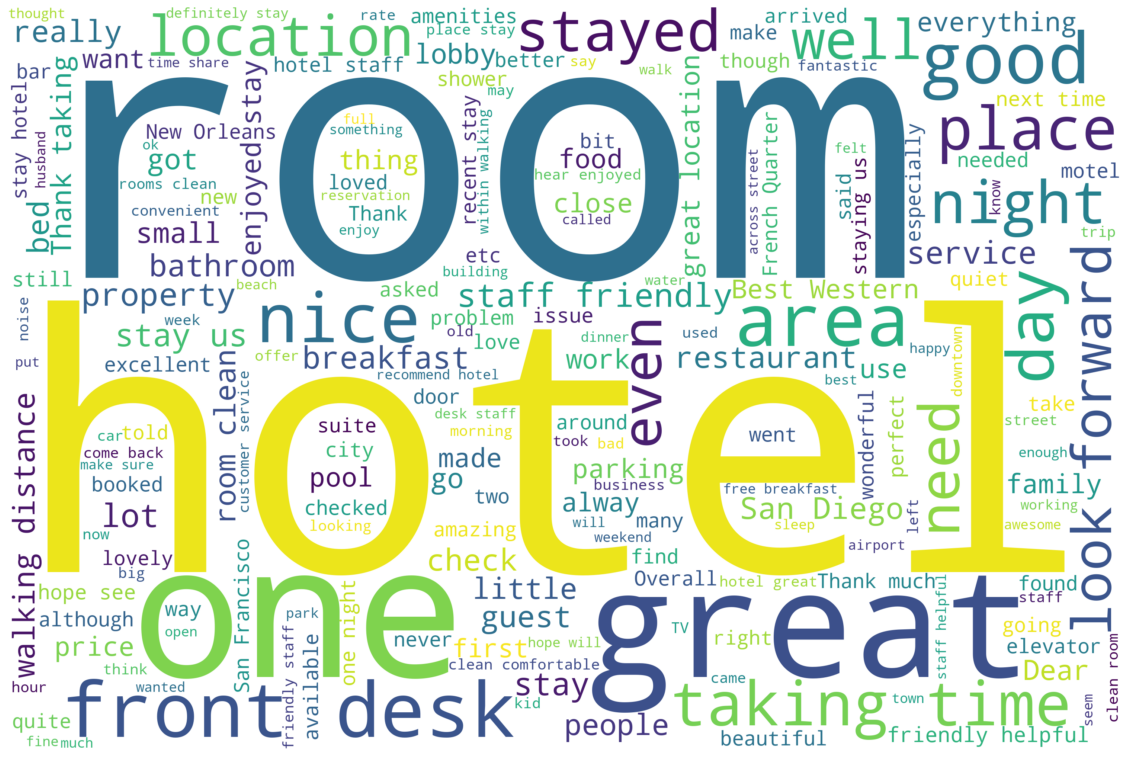

In [ ]:
plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file('wordcloud.png')

In [ ]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/sofa.jpg

In [ ]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/sofa-512.jpg

--2022-04-01 13:55:21--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/sofa-512.jpg
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.149.58
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.149.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12570 (12K) [image/jpeg]
Saving to: ‘sofa-512.jpg’

sofa-512.jpg        100%[===================>]  12.28K  --.-KB/s    in 0.08s   

2022-04-01 13:55:22 (160 KB/s) - ‘sofa-512.jpg’ saved [12570/12570]



In [ ]:
import numpy as np
from PIL import Image
mask = np.array(Image.open('painting-green-leaves-24559 (1).png'))

(-0.5, 1279.5, 1253.5, -0.5)

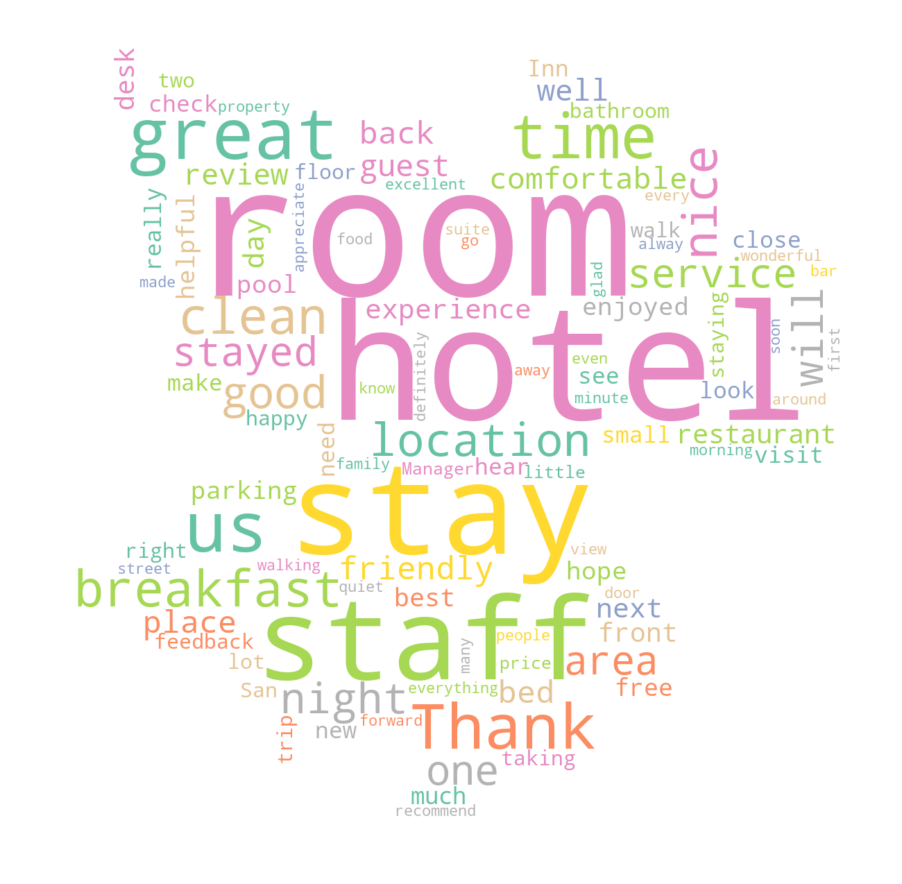

In [ ]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask,max_words=100).generate(text)
plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## 3. wordcloud based on word frequencies

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from collections import Counter
from nltk.stem import WordNetLemmatizer
import re

#lower 
words = text.lower().split()
#remove all symbols
words = [re.sub("[.,!?:;-='...'@#_]", " ", s) for s in words]
#remove all digits
words = [re.sub(r'\d+', '', w) for w in words]
#strip the text
words = [word.strip() for word in words if word not in stopwords]
#remove all spaces
words.remove('')

In [ ]:
# Lemmatization with NLTK
lemmatiser = WordNetLemmatizer()
lem_words = [lemmatiser.lemmatize(w, pos='v') for w in words]
words_counter = Counter(lem_words)

In [ ]:
wordcloud = WordCloud(width = 3000, height = 2000,background_color='white')
wordcloud.generate_from_frequencies(words_counter)

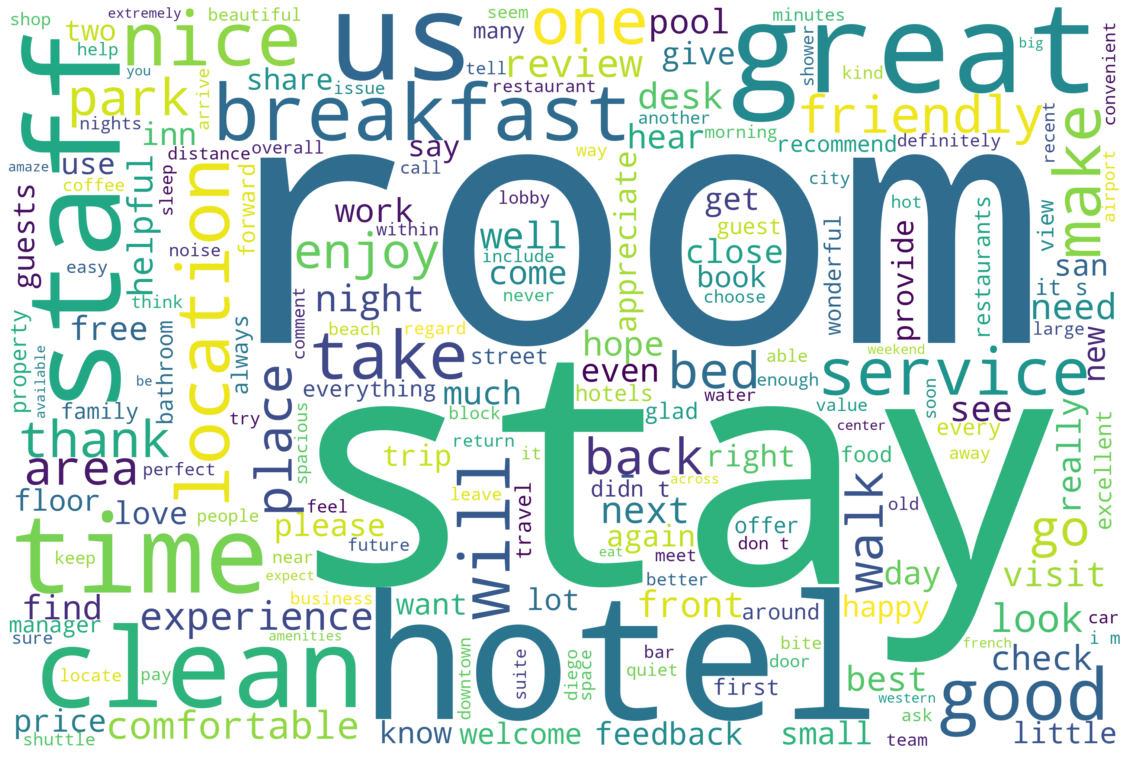

In [ ]:
plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file('wordcloud.png')

(-0.5, 1279.5, 1253.5, -0.5)

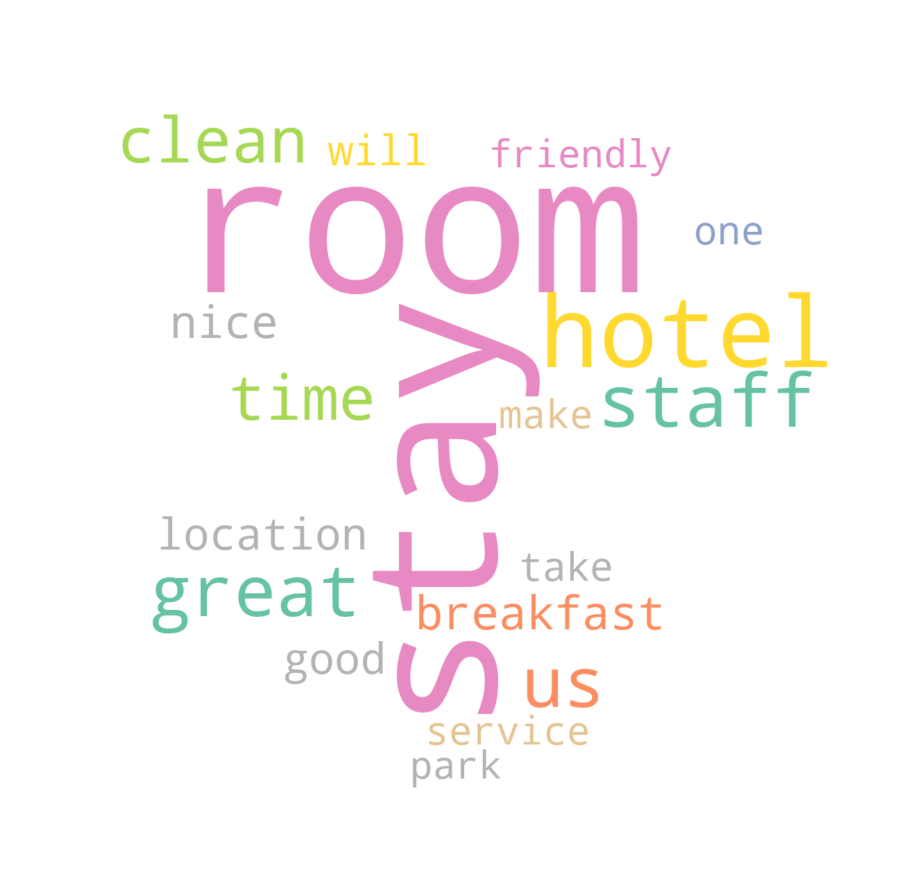

In [ ]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask,max_words=20).generate_from_frequencies(words_counter)
plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## 5. word cloud with tf-idf

In [ ]:
from nltk.tokenize import RegexpTokenizer

df["clean_text"] = df["reviews.text"].apply(lambda s: ' '.join(re.sub("[.,!?:;-='...'@#_]", " ", s).split()))
df["clean_text"] = df["clean_text"].apply(lambda s: ' '.join(re.sub(r'\d+', '', s).split()))

In [ ]:
def rem_en(input_txt):
    words = input_txt.lower().split()
    noise_free_words = [word for word in words if word not in stopwords] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

df["clean_text"] = df["clean_text"].apply(lambda s: rem_en(s))

lemmatiser = WordNetLemmatizer()
df["clean_text"] = df["clean_text"].apply(lambda row: [lemmatiser.lemmatize(r, pos='v') for r in row.split()])

In [ ]:
df["clean_text"] = df["clean_text"].apply(lambda row: ' '.join(row))

In [ ]:
df["clean_text"]

0       hotel nice quiet know train track near train p...
1       stay king suite separation bedroom live space ...
2       park horrible somebody run rental car stay did...
3       cheap excellent location price somewhat standa...
4       room advertise website pay may lucky stay many...
                              ...                        
9995    friends take trip hampton basslights show book...
9996    check departure staff friendly professional wa...
9997    hampton locate quiet street across hospital lo...
9998    awesome wing (my favorite garlic parmesan) gre...
9999    clean facility freeway staff friendly efficien...
Name: clean_text, Length: 10000, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
response = vectorizer.fit_transform(df["clean_text"])

df_tfidf_sklearn = pd.DataFrame(response.toarray(),columns=vectorizer.get_feature_names())
df_tfidf_sklearn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aaaa,aaaahhh,aaha,aan,aanwezig,aaron,aarp,ab,...,zone,zoo,zoom,zoop,zora,zorro,zqaelainem,zu,zudy,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tf_idf_counter = df_tfidf_sklearn.T.sum(axis=1)

In [ ]:
wordcloud = WordCloud(width = 3000, height = 2000,background_color='salmon', colormap='Pastel1')
wordcloud.generate_from_frequencies(tf_idf_counter)

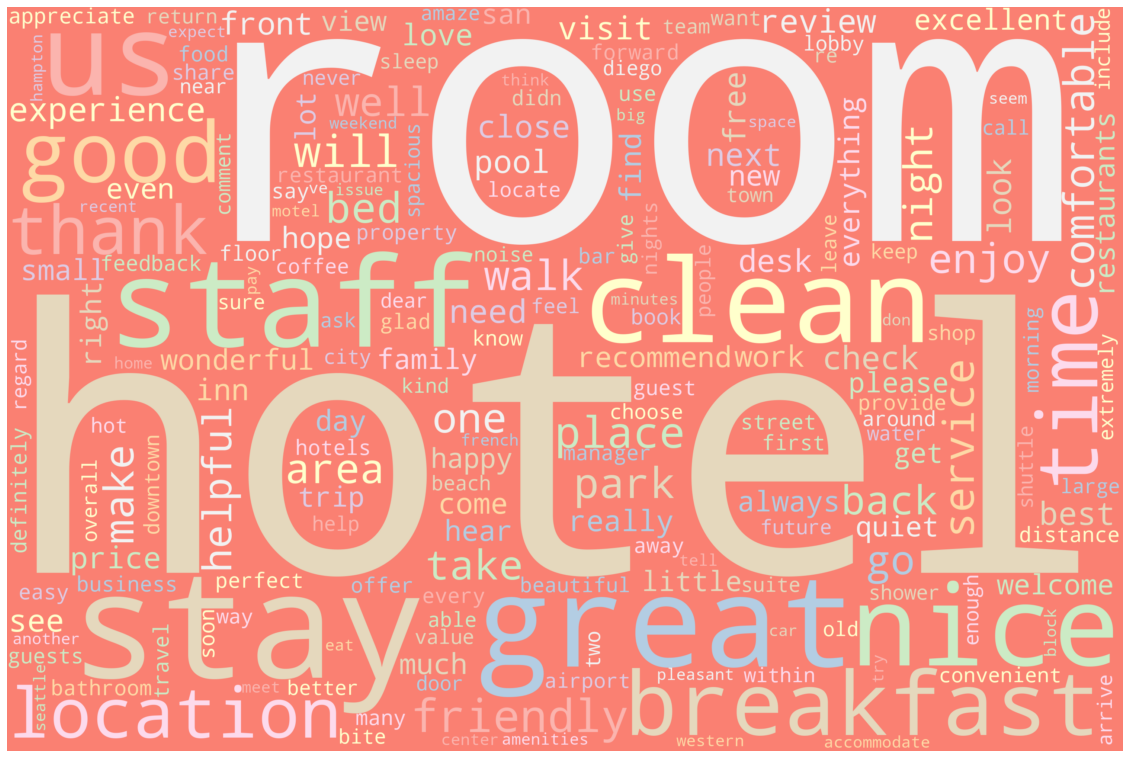

In [ ]:
plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file('wordcloud.png')

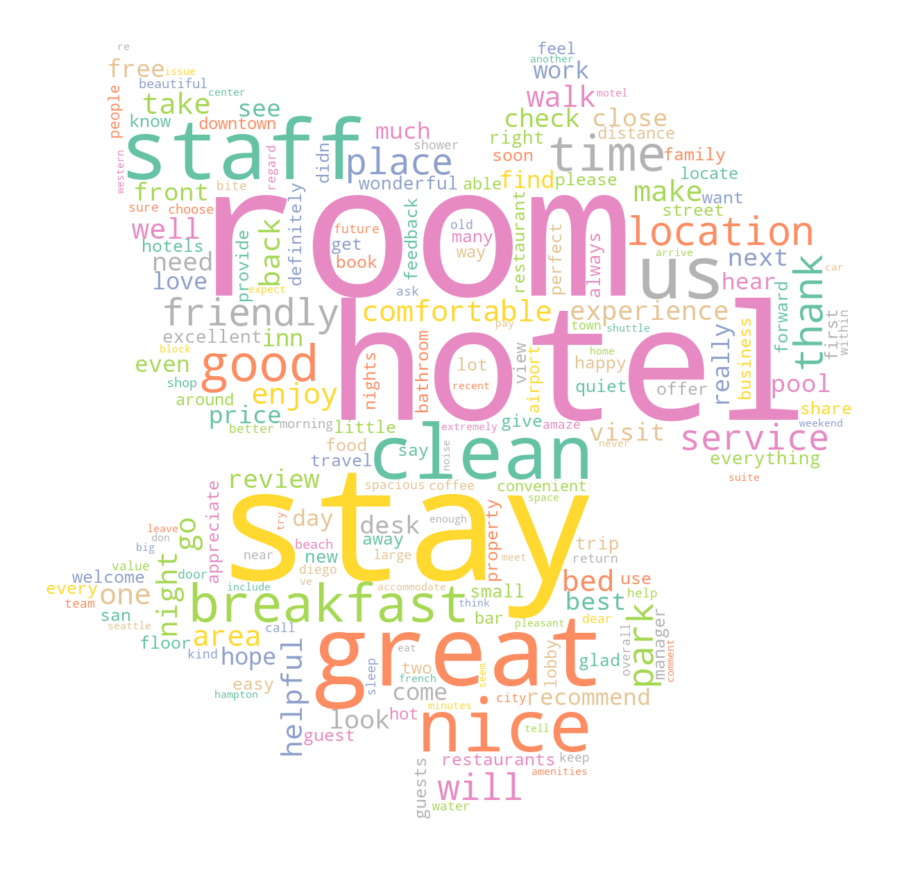

In [ ]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask).generate_from_frequencies(tf_idf_counter)

plt.figure(figsize=(20,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file('wordcloud.png')

(-0.5, 1279.5, 1253.5, -0.5)

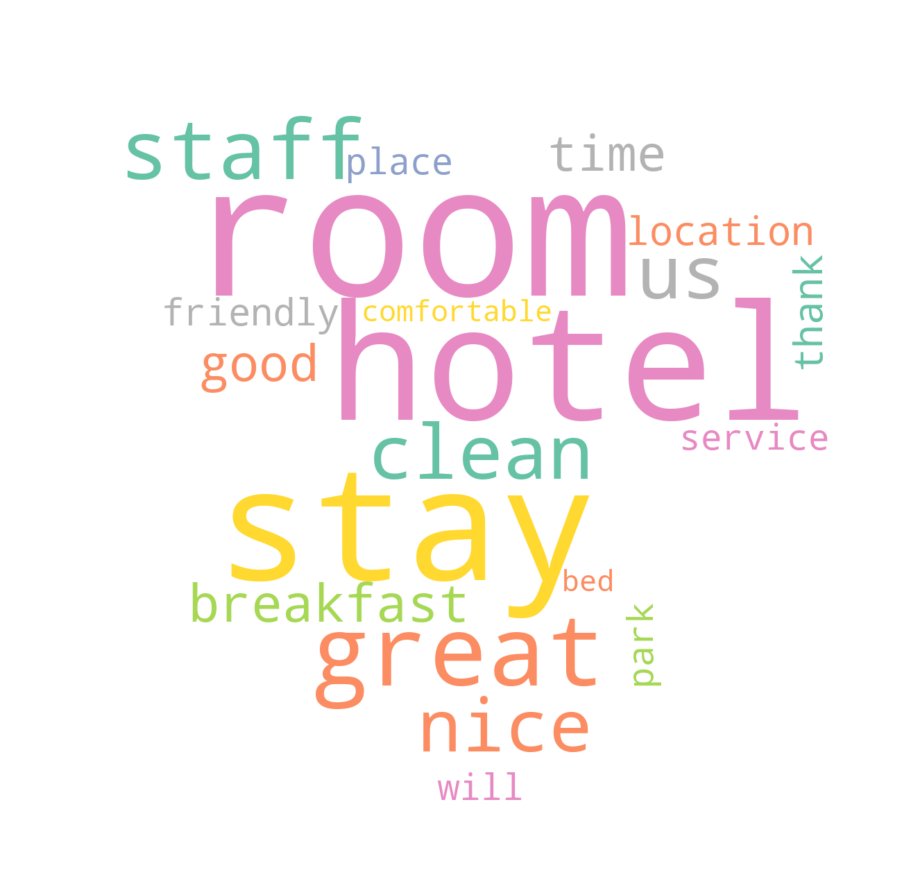

In [ ]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask,max_words=20).generate_from_frequencies(tf_idf_counter)
plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")